In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
df1 = 'NewCAnada.csv'
dfc= pd.read_csv(df1)

In [3]:
dfc

,Country,Type,Coverage,AREA,Continents,REG,RegName,DEV,DevName,1980,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,India,Immigrants,Foreigners,935,Asia,5501,Southern Asia,902,Developing regions,8880,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,648954
1,China,Immigrants,Foreigners,935,Asia,906,Eastern Asia,902,Developing regions,5123,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,639643
2,Philippines,Immigrants,Foreigners,935,Asia,920,South-Eastern Asia,902,Developing regions,6051,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,482657
3,UK,Immigrants,Foreigners,908,Europe,924,Northern Europe,901,Developed regions,22045,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,454290
4,Pakistan,Immigrants,Foreigners,935,Asia,5501,Southern Asia,902,Developing regions,978,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,236367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,American Samoa,Immigrants,Foreigners,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,1,0,0,0,0,0,0,0,5
191,San Marino,Immigrants,Foreigners,908,Europe,925,Southern Europe,901,Developed regions,1,...,0,0,0,0,0,1,0,0,0,4
192,Marshall Islands,Immigrants,Foreigners,909,Oceania,954,Micronesia,902,Developing regions,0,...,0,0,2,0,0,0,0,0,0,2
193,Western Sahara,Immigrants,Foreigners,903,Africa,912,Northern Africa,902,Developing regions,0,...,0,1,0,0,0,0,0,0,0,2


In [4]:
# Indexing the dataset by Counrty
df = dfc.set_index('Country')
df

,Type,Coverage,AREA,Continents,REG,RegName,DEV,DevName,1980,1981,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,Immigrants,Foreigners,935,Asia,5501,Southern Asia,902,Developing regions,8880,8670,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,648954
China,Immigrants,Foreigners,935,Asia,906,Eastern Asia,902,Developing regions,5123,6682,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,639643
Philippines,Immigrants,Foreigners,935,Asia,920,South-Eastern Asia,902,Developing regions,6051,5921,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,482657
UK,Immigrants,Foreigners,908,Europe,924,Northern Europe,901,Developed regions,22045,24796,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,454290
Pakistan,Immigrants,Foreigners,935,Asia,5501,Southern Asia,902,Developing regions,978,972,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,236367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
American Samoa,Immigrants,Foreigners,909,Oceania,957,Polynesia,902,Developing regions,0,1,...,0,1,0,0,0,0,0,0,0,5
San Marino,Immigrants,Foreigners,908,Europe,925,Southern Europe,901,Developed regions,1,0,...,0,0,0,0,0,1,0,0,0,4
Marshall Islands,Immigrants,Foreigners,909,Oceania,954,Micronesia,902,Developing regions,0,0,...,0,0,2,0,0,0,0,0,0,2


In [5]:
# Ploting the scatter plot
years = list(map(str, range(1980,2014)))

In [6]:
# we can use the sum() method to get the total population per year
df_tot = pd.DataFrame(df[years].sum(axis=0))
# change the years to type int (useful for regression later on)
df_tot.index = map(int, df_tot.index)

# reset the index to put in back in as a column in the df_tot dataframe
df_tot.reset_index(inplace=True)
# rename columns
df_tot.columns = ['year', 'total']

# view the final dataframe
df_tot.head()


,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


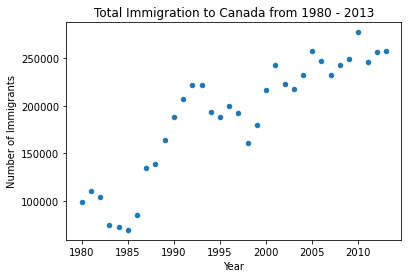

In [7]:
# Plotting the scatterPlot
df_tot.plot(kind= 'scatter', x= 'year', y= 'total')
plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.show()


In [8]:
# Finding the fit
x = df_tot['year']      # year on x-axis
y = df_tot['total']     # total on y-axis
fit = np.polyfit(x, y, deg=1)
fit

array([ 5.56709228e+03, -1.09261952e+07])

In [9]:
kk= fit[0] * 1980+ fit[1]
kk.round(2)

96647.48

In [10]:
# Ploting Bubble chart
# transposed dataframe
df_can_t = df[years].transpose()

# cast the Years (the index) to type int
df_can_t.index = map(int, df_can_t.index)

# let's label the index. This will automatically be the column name when we reset the index
df_can_t.index.name = 'Year'

# reset index to bring the Year in as a column
df_can_t.reset_index(inplace=True)

# view the changes
df_can_t.head()


Country,Year,India,China,Philippines,UK,Pakistan,United States of America,Iran (Islamic Republic of),Sri Lanka,Republic of Korea,...,Kiribati,Vanuatu,Sao Tome and Principe,Tuvalu,New Caledonia,American Samoa,San Marino,Marshall Islands,Western Sahara,Palau
0,1980,8880,5123,6051,22045,978,9378,1172,185,1011,...,0,0,0,0,0,0,1,0,0,0
1,1981,8670,6682,5921,24796,972,10030,1429,371,1456,...,0,0,0,1,0,1,0,0,0,0
2,1982,8147,3308,5249,20620,1201,9074,1822,290,1572,...,0,0,0,0,0,0,0,0,0,0
3,1983,7338,1863,4562,10015,900,7100,1592,197,1081,...,1,0,0,0,0,0,0,0,0,0
4,1984,5704,1527,3801,10170,668,6661,1977,1086,847,...,0,0,0,1,0,0,0,0,0,0


In [11]:
# normalize Brazil data
norm_brazil = (df_can_t['Brazil'] - df_can_t['Brazil'].min()) / \
    (df_can_t['Brazil'].max() - df_can_t['Brazil'].min())

# normalize Argentina data
norm_argentina = (df_can_t['Argentina'] - df_can_t['Argentina'].min()) / \
    (df_can_t['Argentina'].max() - df_can_t['Argentina'].min())


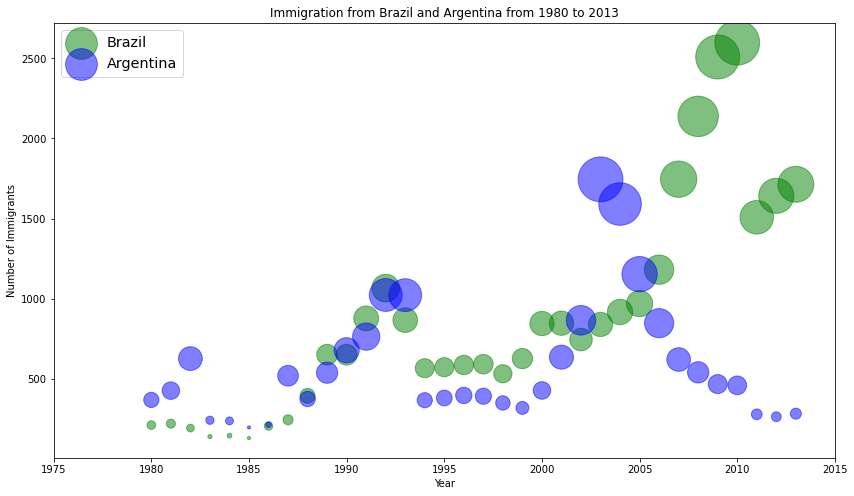

In [15]:
# Brazil
# Brazil
ax0 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Brazil',
                    figsize=(14, 8),
                    alpha=0.5,  # transparency
                    color='green',
                    s=norm_brazil * 2000 + 10,  # pass in weights
                    xlim=(1975, 2015)
                    )

# Argentina
ax1 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Argentina',
                    alpha=0.5,
                    color="blue",
                    s=norm_argentina * 2000 + 10,
                    ax=ax0
                    )

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from Brazil and Argentina from 1980 to 2013')
ax0.legend(['Brazil', 'Argentina'], loc='upper left', fontsize='x-large')
